In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'data/ex1data2.csv'
data = pd.read_csv(data_path, header=None)
print(data.shape)
data.head()

(47, 3)


,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


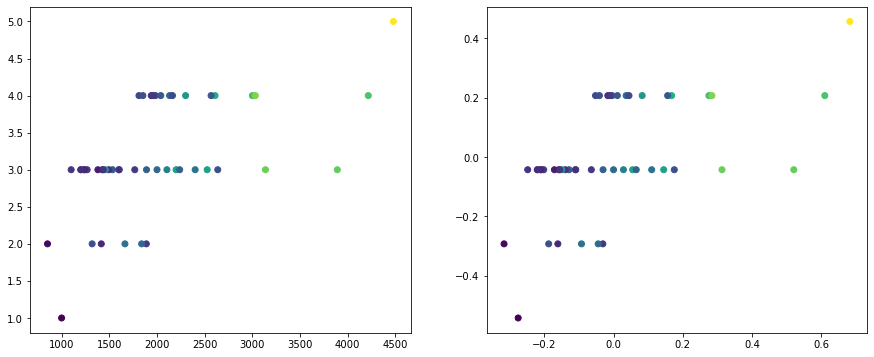

In [3]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
ax1.scatter(data[0], data[1], c=data[2])

n = data.shape[1] - 1
m = data.shape[0]
pdata = np.zeros((n, m))

for i in range(0, n):
    miu = np.mean(data[i])
    delta = max(data[i]) - min(data[i])
    pdata[i] = (data[i] - miu) / delta

ax2 = fig.add_subplot(122)
ax2.scatter(pdata[0], pdata[1], c=data[2]);


In [4]:
cost = lambda x, y, w, b: np.sum(np.square(x.dot(w) + b - y) / (2 * m))

def gradient_descent(x, y, steps, alpha):
    n = x[0].size
    m = x.size
    w = np.zeros(n)
    b = 0
    cost_hist = np.zeros(steps)

    for step in range(steps):
        gradient = x.T.dot((x.dot(w) + b - y) / m)
        b = b - alpha * sum((x.dot(w) + b - y) / m)
        w = w - alpha * gradient
        cost_hist[step] = cost(x, y, w, b)
    
    return (w, b, cost_hist)
    

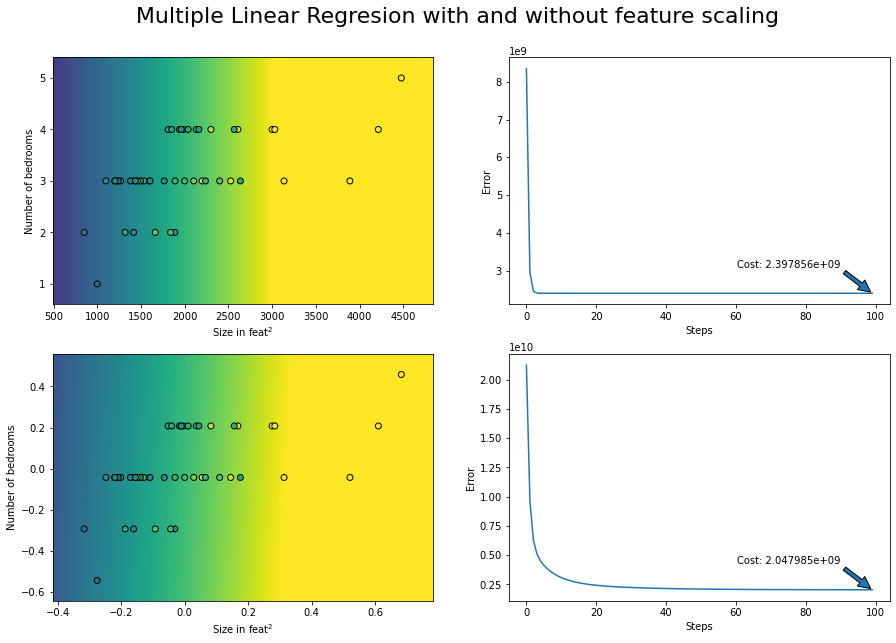

In [5]:
from matplotlib.pyplot import figtext


def vs(steps):
    def plot(fig, x, y, w, b, cost_hist, line):
        ax1 = fig.add_subplot(221+2*line)
        xlim = [min(x.T[0]), max(x.T[0])]
        ylim = [min(x.T[1]), max(x.T[1])]
        x_range = xlim[1] - xlim[0] 
        y_range = ylim[1] - ylim[0] 
        X = np.linspace(xlim[0] - 0.1 * x_range, xlim[1] + 0.1 * x_range, 256)
        Y = np.linspace(ylim[0] - 0.1 * y_range, ylim[1] + 0.1 * y_range, 256)
        X, Y = np.meshgrid(X, Y)
        Z = w[0] * X + w[1] * Y + b
        ax1.contourf(X, Y, Z, levels=256, vmin=0, vmax=500000)
        ax1.scatter(x.T[0], x.T[1], c=y, edgecolors='black', vmin=0, vmax=500000)
        ax1.set_xlabel('Size in feat$^2$')
        ax1.set_ylabel('Number of bedrooms')

        ax2 = fig.add_subplot(222+2*line)
        cost = cost_hist[-1]
        steps = cost_hist.size
        ax2.plot(np.arange(0, steps, 1), cost_hist)
        ax2.set_xlabel('Steps')
        ax2.set_ylabel('Error')        
        ax2.annotate(f'Cost: {cost:e}', 
            xy=(steps-1, cost),
            xytext=(0.6, 0.15),
            textcoords='axes fraction',
            arrowprops = dict(shrink=0.05),
        )

    fig = plt.figure(figsize=(15, 10))
    title = 'Multiple Linear Regresion with and without feature scaling'
    fig.suptitle(title, fontsize=22, y=0.95)

    x = np.array(data.iloc[:,:n])
    y = data[n]
    alpha = 0.0000003
    w, b, cost_hist = gradient_descent(x, y, steps, alpha)
    plot(fig, x, y, w, b, cost_hist, 0)

    x = pdata.T
    alpha = 3
    w, b, cost_hist = gradient_descent(x, y, steps, alpha)
    plot(fig, x, y, w, b, cost_hist, 1)

steps = 100
vs(steps)